In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Default

In [2]:
# ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ

# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))
    
# вычисление производной от сигмоид функции
def sigm_deriv(x):
        return x * (1 - x)
    
# вычисление Relu функции
def ReLU(x):
         return x  *  (x  >  0)

In [3]:
# ШАГ 1.
# Определение функций, которые понадобяться для обучения

# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


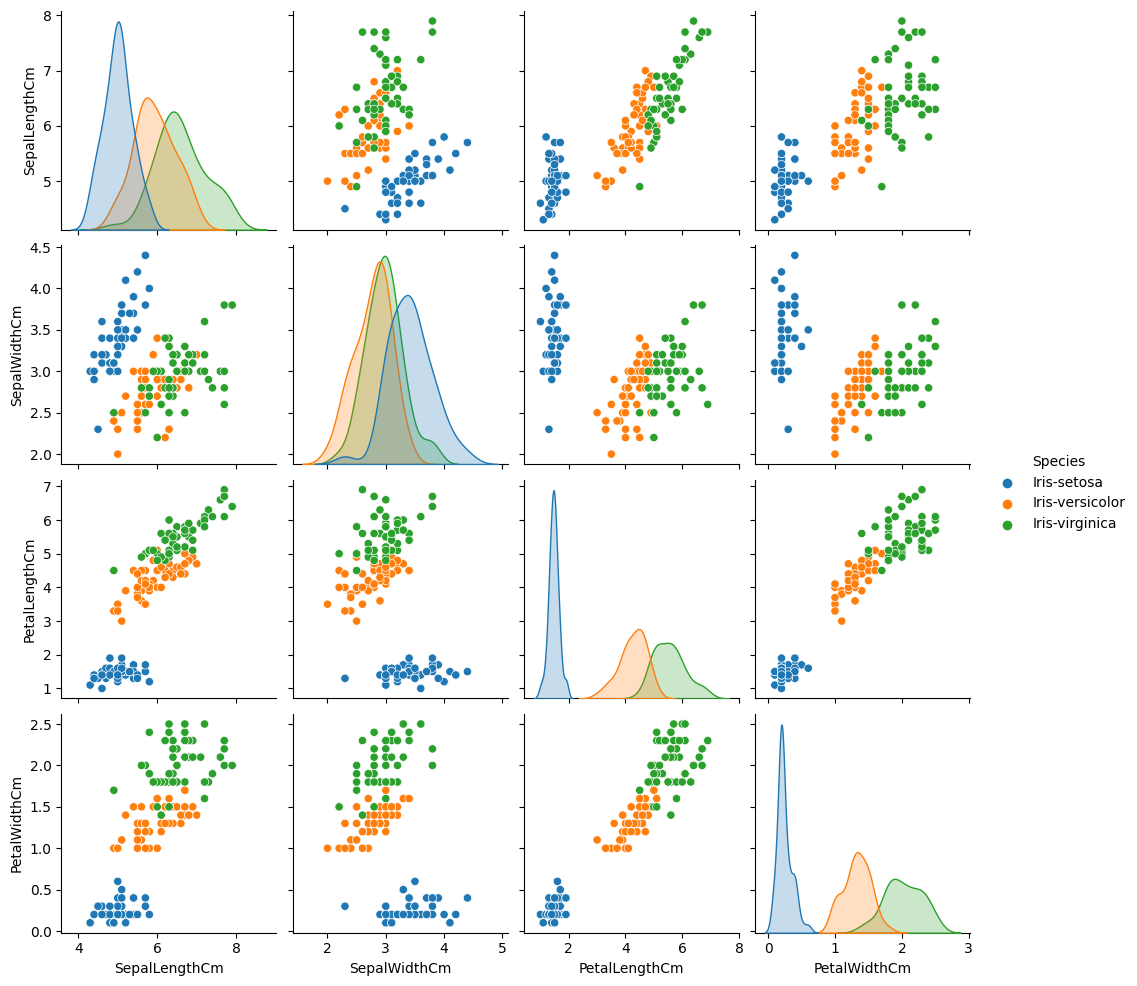

In [4]:
# ШАГ 2.
# Подготовка тренировочных данных

# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()  # as_matrix() выдаёт AttributeError, решение - использовать to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   

In [7]:
# ШАГ 3 + 4.
# Обученние нейронной сети
# +
# Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения

def nn(hidden_num, n, epoch, x, y, Show=False):
    w0 = 2 * np.random.random((4, hidden_num)) - 1
    w1 = 2 * np.random.random((hidden_num, 3)) - 1
    
    # массив для ошибок, чтобы потом построить график
    errors = []
    
    # процесс обучения
    for i in range(epoch):

        # прямое распространение(feed forward)
        layer0 = x
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y - layer2
        layer2_delta = layer2_error * sigm_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigm_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
        
    if Show==True:
        
        N = 50
        plt.figure(figsize = (16,5))
        plt.plot(layer2[:N,1], 'r',label = 'Y new')
        plt.plot(y[:N,1],'g', label = 'Y train')
        plt.xlabel('№ примера')
        plt.ylabel('выход сети и целевой')
        plt.legend( )
        plt.grid()
        plt.show()

        plt.plot(errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.show()

In [8]:
# train
nn(5, 0.1, 10000, X_train, y_train)

Точность нейронной сети 96.49%


Точность нейронной сети 98.47%


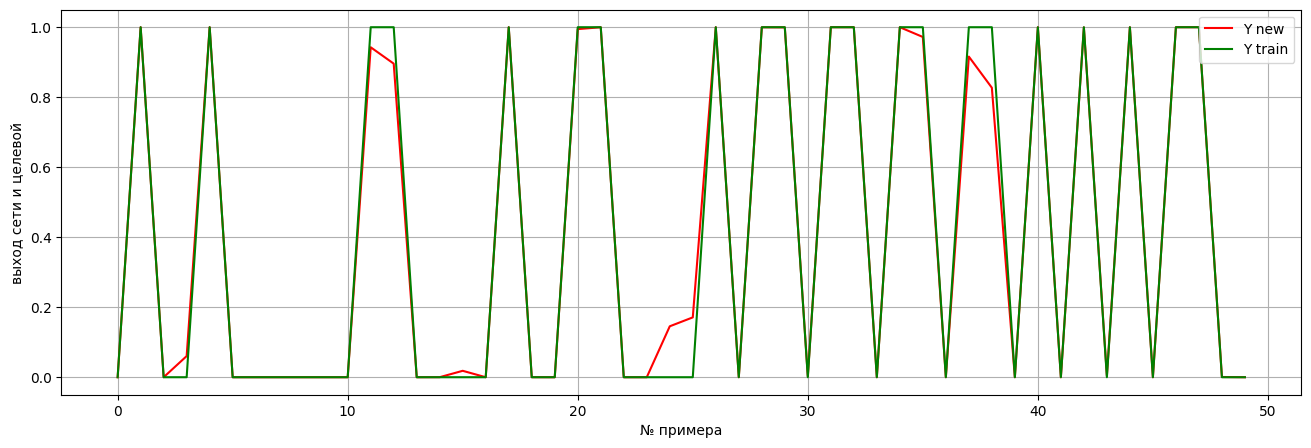

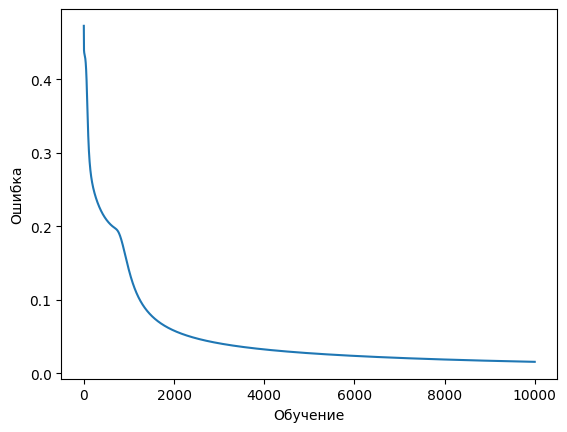

In [9]:
# test
nn(5, 0.1, 10000, X_test, y_test, Show=True)

### Проверяем количество эпох

In [10]:
# train
nn(5, 0.1, 100, X_train, y_train)

Точность нейронной сети 75.72%


Точность нейронной сети 66.05%


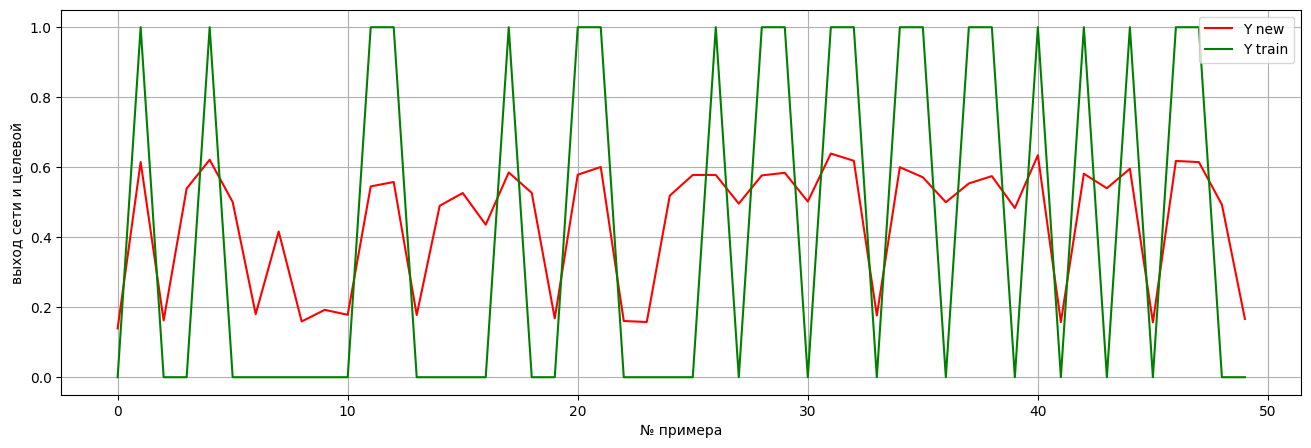

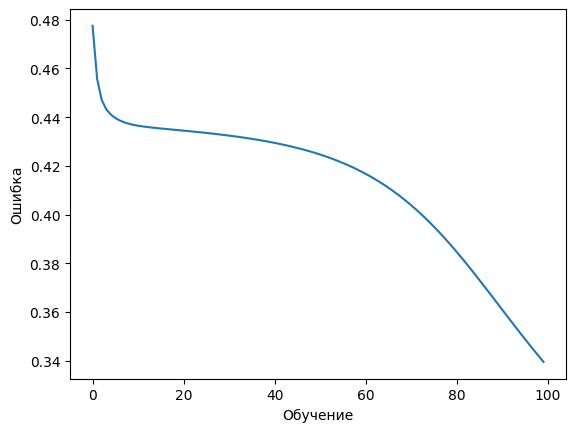

In [11]:
# test
nn(5, 0.1, 100, X_test, y_test, Show=True)

In [12]:
# train
nn(5, 0.1, 30000, X_train, y_train)

Точность нейронной сети 96.71%


Точность нейронной сети 99.39%


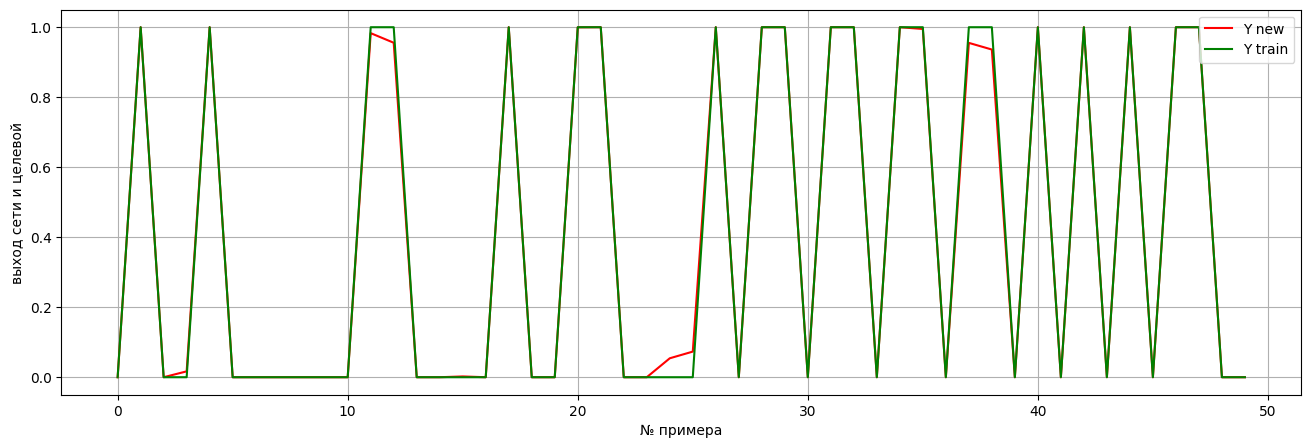

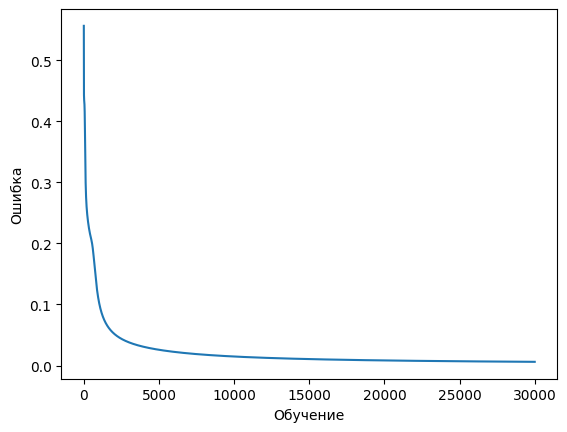

In [13]:
# test
nn(5, 0.1, 30000, X_test, y_test, Show=True)

### Проверяем количество нейронов внутреннего слоя

In [14]:
# train
nn(10, 0.1, 10000, X_train, y_train)

Точность нейронной сети 96.53%


Точность нейронной сети 98.59%


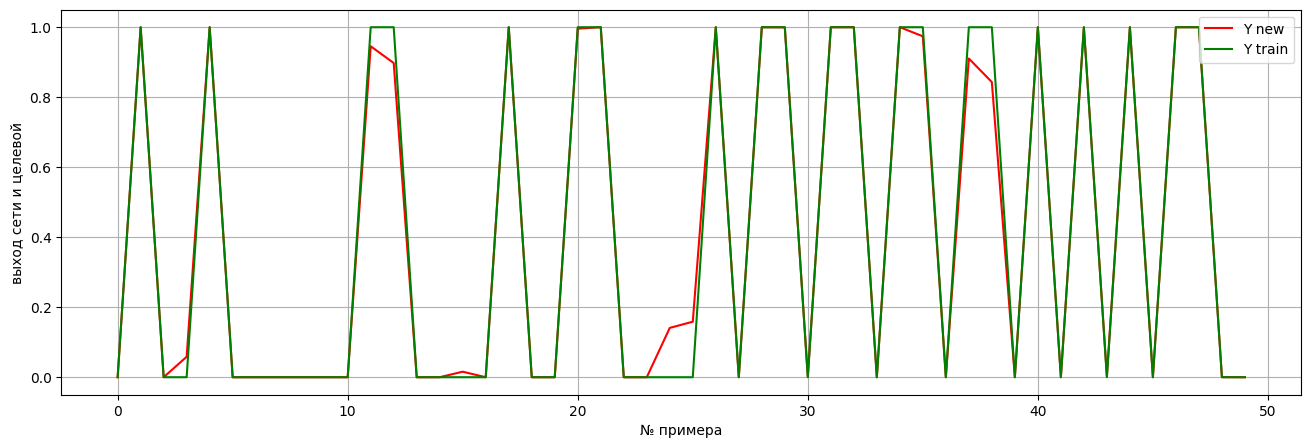

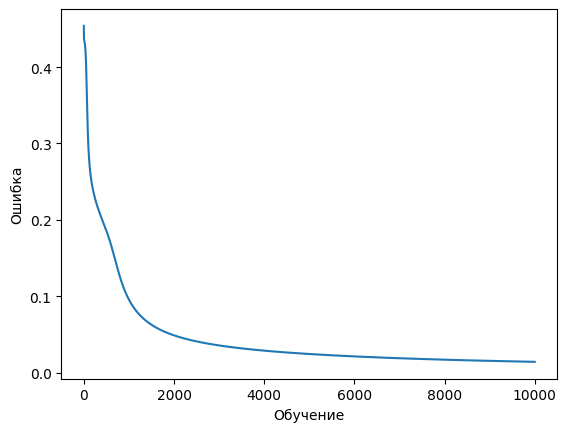

In [15]:
# test
nn(10, 0.1, 10000, X_test, y_test, Show=True)

In [16]:
# train
nn(3, 0.1, 10000, X_train, y_train)

Точность нейронной сети 96.33%


Точность нейронной сети 98.51%


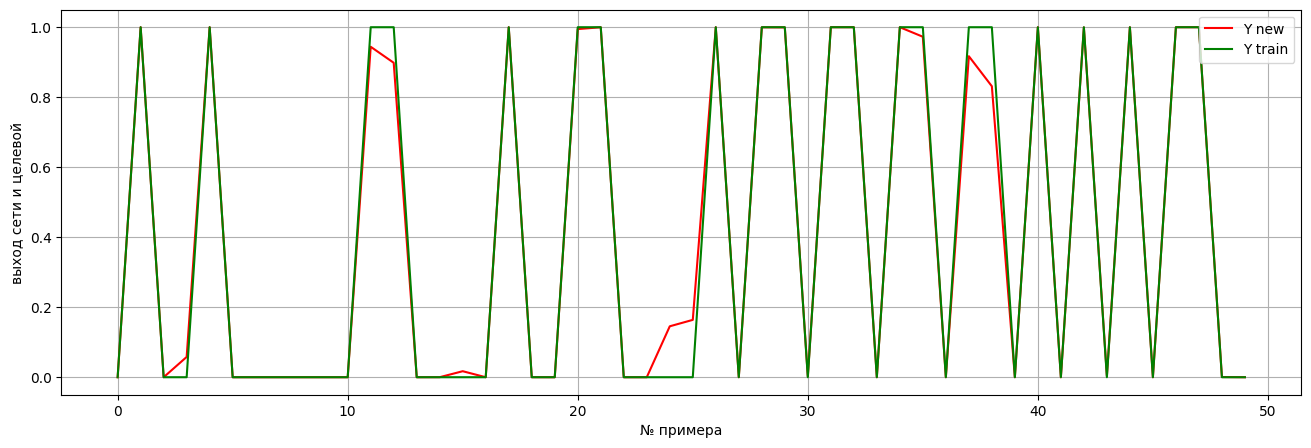

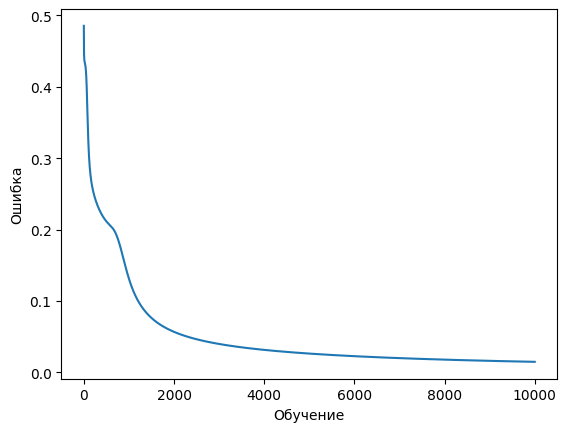

In [17]:
# test
nn(3, 0.1, 10000, X_test, y_test, Show=True)

### Проверяем learning rate

In [18]:
# train
nn(5, 0.01, 10000, X_train, y_train)

Точность нейронной сети 93.79%


Точность нейронной сети 90.24%


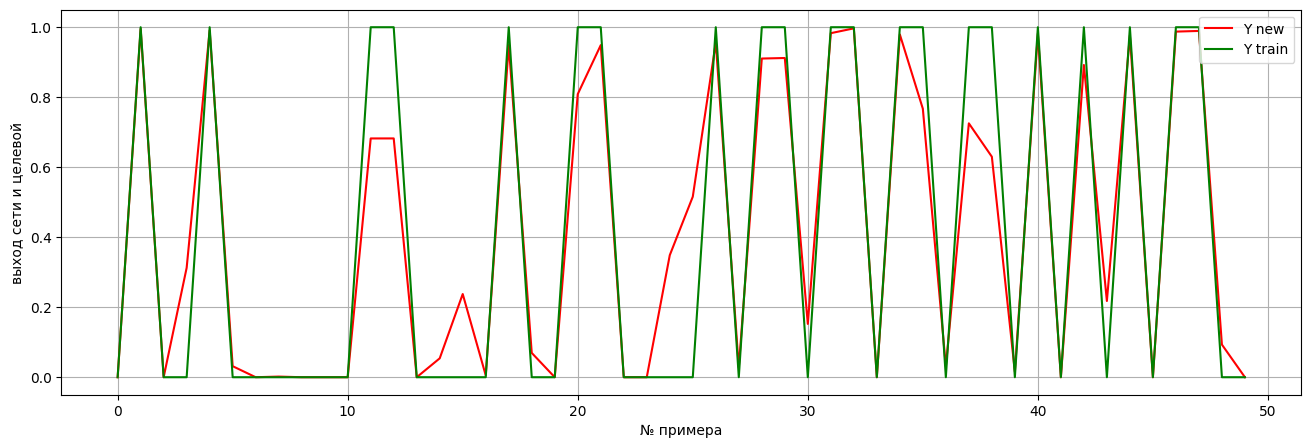

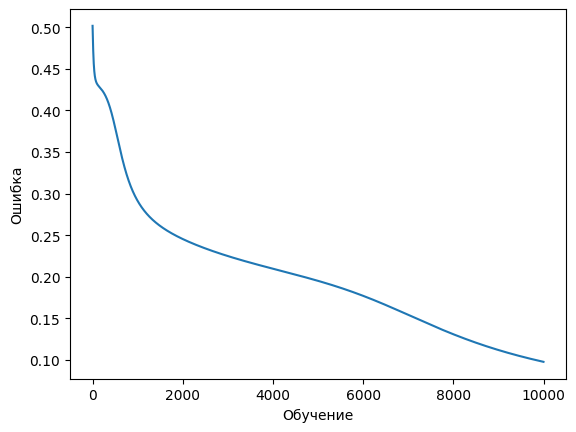

In [19]:
# test
nn(5, 0.01, 10000, X_test, y_test, Show=True)

### Вывод

Прямая зависимость точности нс от количества эпох и нейронов скрытого слоя, при этом больший вклад у эпох. По коэффициенту скорости обучения нельзя сделать однозначный вывод, так как этот показатель подбирается эмпирически.